In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('F:\\machine learning\\datasets\\titanic\\tt.csv')
df_test = pd.read_csv('F:\\machine learning\\datasets\\titanic\\testt.csv')
df.sample(5)
df.columns
df_test


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [3]:
print((df.isnull()).any())
print('_'*50)
print(df_test.isnull().any())

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool
__________________________________________________
PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool


In [4]:
df[df['Embarked'].isnull()]
df_test['Fare'].isnull().value_counts()

False    417
True       1
Name: Fare, dtype: int64

In [5]:
df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [6]:
df['Embarked'].fillna('S', inplace = True)
df.isnull().any()
df_test['Fare'].fillna(df_test['Fare'].mean(), inplace = True)
df_test.isnull().any()


PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
dtype: bool

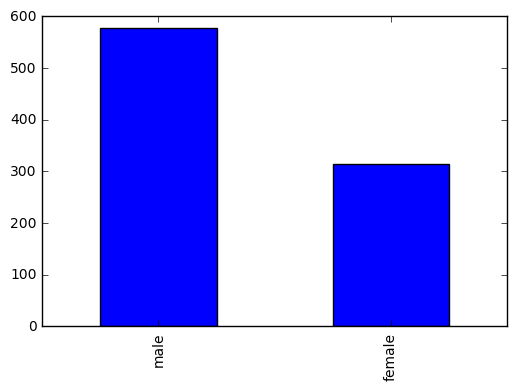

In [7]:
df['Age'].isnull().value_counts()
df['Sex'].value_counts().plot(kind = 'bar')

In [8]:
print(df[['Pclass','Survived']].groupby(by = 'Pclass', as_index = False).mean())
print(df[['Sex','Survived']].groupby(by = 'Sex', as_index = False).mean())


   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
      Sex  Survived
0  female  0.742038
1    male  0.188908


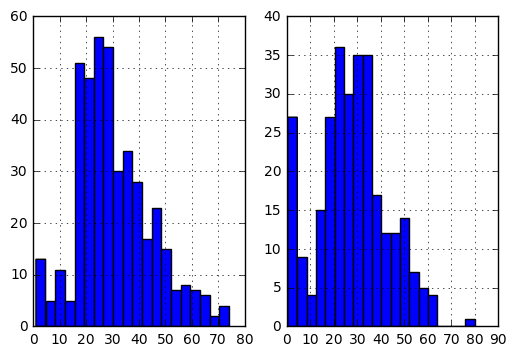

In [9]:
fig, axes = plt.subplots(1,2)
df[df['Survived'] == 0]['Age'].hist(bins = 20, ax = axes[0])
df[df['Survived'] == 1]['Age'].hist(bins = 20, ax = axes[1])


In [9]:
df[['Embarked', 'Survived']].groupby(by = 'Embarked').mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


In [11]:
df.drop('PassengerId', axis = 1).corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [10]:
print(df[['Age','Pclass']].groupby('Pclass').mean())
print(df[['Pclass','Survived']].groupby('Pclass').mean())
df['Pclass'].corr(df['Age'])

              Age
Pclass           
1       38.233441
2       29.877630
3       25.140620
        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363


-0.36922601531551724

In [11]:
df['Fare'].describe()
def con(cell):
    if cell =='male':
        return int(0)
    else:
        return int(1)
df['Sex'] = df['Sex'].apply(con)
df_test['Sex'] = df_test['Sex'].apply(con)
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333
Age,0.036847,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000


In [12]:
df1 = df[['Sex', 'Pclass', 'Survived']].copy()
df1['Sur'] = df['Survived']
pd.pivot_table(df1, index = ['Sex','Pclass'], values = 'Survived')
df['Gender_class'] = df['Sex'].mul(df['Pclass'])
df.drop('Gender_class',axis =1, inplace = True)
df['Family'] = df['SibSp'] + df['Parch'] + 1
df_test['Family'] = df_test['SibSp'] + df_test['Parch'] + 1
df[['Family', 'Survived']].groupby(by = 'Family').mean()
#df['AGEQ'] = pd.cut(df['Age'], bins = 4)
df.dropna()[['Family', 'Age']].groupby(by = 'Family').mean()
#df['Fare'] = pd.cut(df['Fare'], bins = 7)
#df['Fare'].dtype

#df['Age'] = df['Age'].apply(lambda x: int(x))
df['Ageband'] = pd.cut(df['Age'], bins = 5)
df.loc[df['Age'] <= 16, 'Age'] = 0
df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age'] = 1
df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age'] = 2
df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age'] = 3
df.loc[(df['Age'] > 64) & (df['Age'] <= 80), 'Age'] = 4
#df['Age']
df.head()
df.drop('Ageband', axis = 1, inplace = True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,S,1


In [13]:
df['Fareband'] = pd.cut(df['Fare'], bins = 5)
df['Fareband']
df.loc[df['Fare'] <= 102, 'Fare'] = 0
df.loc[(df['Fare'] > 102) & (df['Fare'] <= 204), 'Fare'] = 1
df.loc[(df['Fare'] > 204) & (df['Fare'] <= 307), 'Fare'] = 2
df.loc[(df['Fare'] > 307) & (df['Fare'] <= 409), 'Fare'] = 3
df.loc[(df['Fare'] > 409) & (df['Fare'] <= 513), 'Fare'] = 4
#df['Age']
df.head()
df.drop('Fareband', axis = 1, inplace = True)
df['Fare'].dtypes


dtype('float64')

In [14]:
y = df.loc[df['Age'].isnull()].copy()
y.drop('Age', axis = 1, inplace = True)
df.drop(['Cabin','Ticket'], axis = 1, inplace = True)
df.dropna(inplace = True)
from sklearn.tree import DecisionTreeClassifier
predict_x = df[['Family','Pclass', 'Sex','Survived','Fare']].values
predict_y = df.Age
clf = DecisionTreeClassifier()
clf = clf.fit(predict_x, predict_y)
new_y = clf.predict(y[['Family','Pclass', 'Sex','Survived','Fare']])
y['Age'] = new_y
y.head()
y['Age'] = y['Age'].apply(lambda x: int(x))
y.drop(['Cabin','Ticket'], axis = 1, inplace = True)
y

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked,Family,Age
5,6,0,3,"Moran, Mr. James",0,0,0,0.0,Q,1,1
17,18,1,2,"Williams, Mr. Charles Eugene",0,0,0,0.0,S,1,1
19,20,1,3,"Masselmani, Mrs. Fatima",1,0,0,0.0,C,1,1
26,27,0,3,"Emir, Mr. Farred Chehab",0,0,0,0.0,C,1,1
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",1,0,0,0.0,Q,1,1
29,30,0,3,"Todoroff, Mr. Lalio",0,0,0,0.0,S,1,1
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",1,1,0,1.0,C,2,1
32,33,1,3,"Glynn, Miss. Mary Agatha",1,0,0,0.0,Q,1,1
36,37,1,3,"Mamee, Mr. Hanna",0,0,0,0.0,C,1,1
42,43,0,3,"Kraeff, Mr. Theodor",0,0,0,0.0,C,1,1


In [15]:
print(df.shape)
print(y.shape)
pf = [df, y]
pf = pd.concat(pf)
print(pf.shape)
pf.isnull().any()

(714, 11)
(177, 11)
(891, 11)


Age            False
Embarked       False
Family         False
Fare           False
Name           False
Parch          False
PassengerId    False
Pclass         False
Sex            False
SibSp          False
Survived       False
dtype: bool

In [16]:
df_test.drop(['Ticket', 'Cabin'], axis = 1, inplace = True)
df_test.shape


(418, 10)

In [17]:
df_test1 = df_test.copy()
#print(type(df_test1['Age'].mean()))
df_test1['Age'].fillna((df_test1['Age'].mean()), inplace = True)
df_test1['Age'] = df_test1['Age'].apply(lambda x: int(x))
df_test1.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Fare           False
Embarked       False
Family         False
dtype: bool

In [18]:
def con_embarked(cell):
    if cell =='S':
        return int(1)
    elif cell =='Q':
        return int(2)
    else:
        return int(3)
pf['Embarked'] = pf['Embarked'].apply(con_embarked)
df_test1['Embarked'] = df_test1['Embarked'].apply(con_embarked)
pf.head()
df_test1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,892,3,"Kelly, Mr. James",0,34,0,0,7.8292,2,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47,1,0,7.0000,1,2
2,894,2,"Myles, Mr. Thomas Francis",0,62,0,0,9.6875,2,1
3,895,3,"Wirz, Mr. Albert",0,27,0,0,8.6625,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22,1,1,12.2875,1,3


In [19]:
#pf['Age'] = pf['Age'].apply(lambda x: int(x))
#pf['Ageband'] = pd.cut(pf['Age'], bins = 5)
#pf['Ageband']
#pf.loc[pf['Age'] <= 16, 'Age'] = 0
#pf.loc[(pf['Age'] > 16) & (pf['Age'] <= 32), 'Age'] = 1
#pf.loc[(pf['Age'] > 32) & (pf['Age'] <= 48), 'Age'] = 2
#pf.loc[(pf['Age'] > 48) & (pf['Age'] <= 64), 'Age'] = 3
#pf.loc[(pf['Age'] > 64) & (pf['Age'] <= 80), 'Age'] = 4
#pf['Age']
df_test1['Ageband'] = pd.cut(df_test1['Age'], bins = 5)
#pf['Ageband']
df_test1.loc[df_test1['Age'] <= 16, 'Age'] = 0
df_test1.loc[(df_test1['Age'] > 16) & (df_test1['Age'] <= 32), 'Age'] = 1
df_test1.loc[(df_test1['Age'] > 32) & (df_test1['Age'] <= 48), 'Age'] = 2
df_test1.loc[(df_test1['Age'] > 48) & (df_test1['Age'] <= 64), 'Age'] = 3
df_test1.loc[(df_test1['Age'] > 64) & (df_test1['Age'] <= 80), 'Age'] = 4
#df_test1['Age']
df_test.loc[df_test['Fare'] <= 102, 'Fare'] = 0
df_test.loc[(df_test['Fare'] > 102) & (df_test['Fare'] <= 204), 'Fare'] = 1
df_test.loc[(df_test['Fare'] > 204) & (df_test['Fare'] <= 307), 'Fare'] = 2
df_test.loc[(df_test['Fare'] > 307) & (df_test['Fare'] <= 409), 'Fare'] = 3
df_test.loc[(df_test['Fare'] > 409) & (df_test['Fare'] <= 513), 'Fare'] = 4


In [20]:
from sklearn.ensemble import RandomForestClassifier
features = pf[['Age', 'Sex','Pclass', 'Embarked','Fare']].values
target = pf['Survived'].values
clf = RandomForestClassifier(n_estimators = 500)
clf = clf.fit(features, target)
test_features = df_test1[['Age', 'Sex', 'Pclass','Embarked','Fare']].values
y = clf.predict(test_features)
df_test1['Survived'] = y
from sklearn.metrics import accuracy_score
print(accuracy_score(pf['Survived'].values, clf.predict(features)))




0.837261503928


In [23]:
submission = pd.DataFrame({'PassengerId' : df_test1['PassengerId'], 'Survived': df_test1['Survived']})
submission.to_csv('F:\\machine learning\\datasets\\titanic\\submission1.csv', index = False)
y1 = pd.read_csv('F:\\machine learning\\datasets\\titanic\\submission1.csv')
y2 = pd.read_csv('F:\\machine learning\\datasets\\titanic\\submission.csv')
print(accuracy_score(y1['Survived'],y2['Survived']))

0.791866028708
